## 1.데이터 불러오기

### 1-1.지역별 업종기준 기업 통계 데이터

In [2]:
import pandas as pd
region_category = pd.read_excel('./data/지역별 업종기준 기업 통계 데이터.xlsx')
region_category

,기준년월,시도명,시군구명,동,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업구분코드,기업구분,...,매출총액,매출평균액,매출중위액,영업이익총액,영업이익평균액,영업이익중위액,총종업원수,종업원평균수,평균임금_원,벤처기업수
0,2018-12,강원,강릉시,교1동,A,A01,"농업, 임업 및 어업",농업,4,소기업,...,6700.0,6700.0,6700.0,-6206.0,-6206.0,-6206.0,NaN,NaN,NaN,NaN
1,2018-12,강원,강릉시,교1동,A,A01,"농업, 임업 및 어업",농업,99,미분류,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12,강원,강릉시,교1동,A,A01,"농업, 임업 및 어업",농업,99,미분류,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12,강원,강릉시,교1동,A,A02,"농업, 임업 및 어업",임업,4,소기업,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12,강원,강릉시,교1동,A,A02,"농업, 임업 및 어업",임업,4,소기업,...,470123.0,470123.0,470123.0,82867.0,82867.0,82867.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2020-12,서울,강동구,천호2동,L,L68,부동산업,부동산업,3,중기업,...,68709007.0,68709007.0,68709007.0,8859832.0,8859832.0,8859832.0,14.0,14.0,42933905.0,NaN
1048571,2020-12,서울,강동구,천호2동,L,L68,부동산업,부동산업,3,중기업,...,7393648.0,7393648.0,7393648.0,-74813.0,-74813.0,-74813.0,25.0,25.0,25346347.0,NaN
1048572,2020-12,서울,강동구,천호2동,L,L68,부동산업,부동산업,4,소기업,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,25200000.0,NaN
1048573,2020-12,서울,강동구,천호2동,L,L68,부동산업,부동산업,4,소기업,...,7758440.0,7758440.0,7758440.0,1138125.0,1138125.0,1138125.0,18.0,6.0,33700408.0,NaN


### 1-2.주가 데이터

In [25]:
from pykrx import stock
stock_data = stock.get_market_ohlcv_by_date('20200101','20211231','029780')
stock_data.to_csv('stock_data.csv')

In [26]:
stock_data

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2020-01-02,38600,38800,37400,37450,81976,3102019350,-2.98
2020-01-03,37800,38050,37350,37600,87649,3295520750,0.40
2020-01-06,36800,37550,36550,37150,66830,2477696250,-1.20
2020-01-07,37250,37850,37250,37750,71690,2696544750,1.62
2020-01-08,37400,38150,37050,38000,126159,4765461300,0.66
...,...,...,...,...,...,...,...
2021-12-24,34050,34300,33850,34000,151289,5142500250,-0.15
2021-12-27,34100,34200,34000,34200,169981,5799772400,0.59
2021-12-28,34250,34450,34100,34350,372798,12767384250,0.44


### 1-3.재무 데이터

In [1]:
import dart_fss as dart
api_key = 'af983cf5135fd27b1b42edb107d1854207fd26c6'
dart.set_api_key(api_key=api_key)
corp_list = dart.get_corp_list()

Output()

Output()

In [ ]:
corp_name = '삼성카드'
samsung_card = corp_list.find_by_corp_name(corp_name,exactly=True)[0]
fs = samsung_card.extract_fs(bgn_de='20200101')
fs

In [60]:
fs.save(corp_name + 'financial_data.xlsx')

'C:\\Users\\SAMSUNG\\Desktop\\FIND-A 6기\\코칭프로젝트팀\\딜로이트 Risk Advisory Analystics Professional\\fsdata\\삼성카드financial_data.xlsx'

In [4]:
financial_data = pd.read_excel('./data/삼성카드financial_data.xlsx')
financial_data

,Statement of comprehensive income(Unit: KWR),I.영업수익,1.신용판매수익,(1)가맹점수수료,(2)신판이자,(3)연회비,(4)기타,2.금융상품수익,3.할부금융수익,4.리스수익,...,(1)현금흐름위험회피파생상품평가손익,(2)당기손익으로재분류될수있는항목의법인세,2.후속적으로당기손익으로재분류될수없는항목,(1)공정가치측정_기타포괄손익금융자산평가손익,(2)관계기업의기타포괄손익에대한지분,(3)확정급여제도의재측정요소,(4)당기손익으로재분류될수없는항목의법인세,X.당기총포괄손익,1.기본주당이익,2.희석주당이익
0,2010,3607163509929,1538503900261,NaN,NaN,NaN,NaN,750032672005,56709323011,325429748851,...,29834812123,NaN,NaN,NaN,NaN,-25837868415,NaN,1799244686948,9805,NaN
1,2011,3204205551561,1806954019397,NaN,NaN,NaN,NaN,748335771315,50106950436,253077266052,...,-28502119478,NaN,NaN,NaN,NaN,-15216115828,NaN,131061440383,3064,3064.0
2,2012,3817669563919,1881303141752,NaN,NaN,NaN,NaN,663154225680,50112401887,146291331958,...,6079481101,1.808095e+11,-1.122699e+10,NaN,NaN,-14811335337,3.584343e+09,179404357043,6182,6175.0
3,2013,2847053181454,1661615026791,NaN,NaN,NaN,NaN,690903336213,49077327203,178213428294,...,44739352917,-7.959043e+09,1.091918e+10,NaN,NaN,14405256645,-3.486072e+09,357384799150,2368,2368.0
4,2014,3521846574476,1774215654133,NaN,NaN,NaN,NaN,699425701712,31939110554,221864337739,...,-29171491038,1.212464e+11,-7.787386e+09,NaN,NaN,-10252309720,2.464924e+09,268465808590,5685,5685.0
5,2015,3302194058937,1862831514702,NaN,NaN,NaN,NaN,750498693152,23849881385,323252946345,...,-632696462,-2.766922e+10,-7.010158e+09,NaN,NaN,-9228867661,2.218709e+09,413379910331,2892,2892.0
6,2016,3470100460367,2018766647417,NaN,NaN,NaN,NaN,811450948276,31316158784,274646968365,...,5317519102,-1.209940e+10,5.793493e+09,NaN,NaN,7664931756,-1.871439e+09,393134133462,3063,3063.0
7,2017,3899957774677,2191891789339,1.484275e+12,4.513674e+11,1.808597e+11,7.539008e+10,825809625467,50122462342,286757846268,...,46006810031,-3.199885e+10,3.766279e+09,NaN,NaN,4358357789,-5.920786e+08,471688216620,3528,3528.0
8,2018,3354199876836,1692015570030,8.905688e+11,5.267625e+11,2.112446e+11,6.343969e+10,897021839851,58128520721,342050146837,...,-91755316450,2.315904e+10,-2.876727e+10,-3.251882e+10,NaN,-5942768828,9.694313e+09,247886896658,3178,3178.0
9,2019,3293359943020,1695867125899,7.962759e+11,6.019778e+11,2.325232e+11,6.509021e+10,888413858536,34809031424,330028043688,...,-32287463604,8.149356e+09,-2.400859e+10,-1.770420e+10,NaN,-14322006447,8.017620e+09,295971663100,3225,3225.0


## 2. 데이터 파악, 전처리

### 2-1.지역별 업종기준 기업 통계 데이터

- 데이터 칼럼과 자료형 확인

In [3]:
region_category.columns

Index(['기준년월', '시도명', '시군구명', '동', '업종대분류코드', '업종중분류코드', '업종대분류명', '업종중분류명',
       '기업구분코드', '기업구분', '업력구간코드', '업력구간', '총기업수', '매출총액', '매출평균액', '매출중위액',
       '영업이익총액', '영업이익평균액', '영업이익중위액', '총종업원수', '종업원평균수', '평균임금_원', '벤처기업수'],
      dtype='object')

In [4]:
region_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   기준년월     1048575 non-null  object 
 1   시도명      1048575 non-null  object 
 2   시군구명     1044021 non-null  object 
 3   동        1048575 non-null  object 
 4   업종대분류코드  1048575 non-null  object 
 5   업종중분류코드  1048575 non-null  object 
 6   업종대분류명   1048575 non-null  object 
 7   업종중분류명   1048575 non-null  object 
 8   기업구분코드   1048575 non-null  int64  
 9   기업구분     1048575 non-null  object 
 10  업력구간코드   1048575 non-null  int64  
 11  업력구간     1048575 non-null  object 
 12  총기업수     1048575 non-null  int64  
 13  매출총액     403460 non-null   float64
 14  매출평균액    403460 non-null   float64
 15  매출중위액    403460 non-null   float64
 16  영업이익총액   417730 non-null   float64
 17  영업이익평균액  417730 non-null   float64
 18  영업이익중위액  417730 non-null   float64
 19  총종업원수    444499 non-null   float64
 20  종업

- 결측치값 처리

In [5]:
num_columns = [idx for idx, type_ in zip(region_category.dtypes.index, region_category.dtypes) if type_ in ('int64','float64')]
cat_columns = [c for c in region_category.columns if c not in num_columns]
print(f' Numeric columns : {num_columns} \n\n Categorical columns : {cat_columns}')

 Numeric columns : ['기업구분코드', '업력구간코드', '총기업수', '매출총액', '매출평균액', '매출중위액', '영업이익총액', '영업이익평균액', '영업이익중위액', '총종업원수', '종업원평균수', '평균임금_원', '벤처기업수'] 

 Categorical columns : ['기준년월', '시도명', '시군구명', '동', '업종대분류코드', '업종중분류코드', '업종대분류명', '업종중분류명', '기업구분', '업력구간']


In [6]:
#수치형 변수 결측값 처리
region_category['매출총액'] = region_category['매출총액'].fillna(region_category['매출총액'].median())
region_category['매출평균액'] = region_category['매출평균액'].fillna(region_category['매출평균액'].median())
region_category['매출중위액'] = region_category['매출중위액'].fillna(region_category['매출중위액'].median())
region_category['영업이익총액'] = region_category['영업이익총액'].fillna(region_category['영업이익총액'].median())
region_category['영업이익평균액'] = region_category['영업이익평균액'].fillna(region_category['영업이익평균액'].median())
region_category['영업이익중위액'] = region_category['영업이익중위액'].fillna(region_category['영업이익중위액'].median())
region_category['총종업원수'] = region_category['총종업원수'].fillna(region_category['총종업원수'].median())
region_category['종업원평균수'] = region_category['종업원평균수'].fillna(region_category['종업원평균수'].median())
region_category['평균임금_원'] = region_category['평균임금_원'].fillna(region_category['평균임금_원'].median())
region_category['벤처기업수'] = region_category['벤처기업수'].fillna(region_category['벤처기업수'].median())
region_category[num_columns].isnull().sum()

기업구분코드     0
업력구간코드     0
총기업수       0
매출총액       0
매출평균액      0
매출중위액      0
영업이익총액     0
영업이익평균액    0
영업이익중위액    0
총종업원수      0
종업원평균수     0
평균임금_원     0
벤처기업수      0
dtype: int64

In [7]:
#범주형 변수 결측값 처리
region_category[cat_columns] = region_category[cat_columns].fillna('unknown')
region_category[cat_columns].isnull().sum()

기준년월       0
시도명        0
시군구명       0
동          0
업종대분류코드    0
업종중분류코드    0
업종대분류명     0
업종중분류명     0
기업구분       0
업력구간       0
dtype: int64

- 이상치 처리(IQR 기준 이용)

In [90]:
def get_outlier(df=None, column = None, weight=1.5):
    quantile_25 = np.percentile(df[column].values,25)
    quantile_75 = np.percentile(df[column].values,75)
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight 

    lowest_val = quantile_25 - iqr_weight 
    highest_val = quantile_75 + iqr_weight 

    outlier_idx = df[column][ (df[column] < lowest_val) | (df[column] > highest_val) ].index
    return outlier_idx

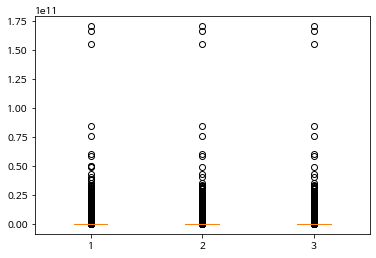

In [93]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12
ax.boxplot([region_category['매출총액'],region_category['매출평균액'],region_category['매출중위액']])
plt.show()

In [94]:
# outlier_idx = get_outlier(df=region_category, column='매출총액', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=region_category, column='매출평균액', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=region_category, column='매출중위액', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=region_category, column='영업이익총액', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=region_category, column='영업이익평균액', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=region_category, column='영업이익중위액', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=region_category, column='총종업원수', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=region_category, column='종업원평균수', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=region_category, column='평균임금_원', weight=1.5)
# region_category.drop(outlier_idx, axis=0, inplace=True)

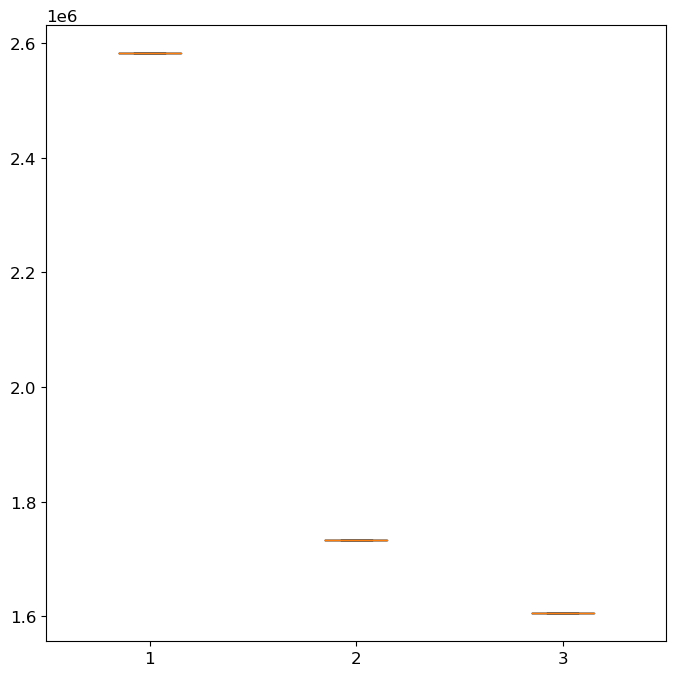

In [95]:
# fig,ax = plt.subplots()
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = (8, 8)
# plt.rcParams['font.size'] = 12
# ax.boxplot([region_category['매출총액'],region_category['매출평균액'],region_category['매출중위액']])
# plt.show()

-> 값이 하나가 되므로 이상치 처리 X

In [8]:
region_category['기준년월'] = pd.to_datetime(region_category['기준년월'])

In [9]:
region_category.head(3)

,기준년월,시도명,시군구명,동,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업구분코드,기업구분,...,매출총액,매출평균액,매출중위액,영업이익총액,영업이익평균액,영업이익중위액,총종업원수,종업원평균수,평균임금_원,벤처기업수
0,2018-12-01,강원,강릉시,교1동,A,A01,"농업, 임업 및 어업",농업,4,소기업,...,6700.0,6700.0,6700.0,-6206.0,-6206.0,-6206.0,11.0,7.0,30185328.5,1.0
1,2018-12-01,강원,강릉시,교1동,A,A01,"농업, 임업 및 어업",농업,99,미분류,...,2582448.5,1732921.0,1605320.5,66407.0,49669.0,46024.0,11.0,7.0,30185328.5,1.0
2,2018-12-01,강원,강릉시,교1동,A,A01,"농업, 임업 및 어업",농업,99,미분류,...,2582448.5,1732921.0,1605320.5,66407.0,49669.0,46024.0,11.0,7.0,30185328.5,1.0


- csv파일로 내보내기

In [10]:
region_category.to_csv('region_category_preprocess.csv',index=False,encoding='euc-kr')

### 2-2.주가 데이터

- 데이터 칼럼과 자료형

In [27]:
stock_data.columns

Index(['시가', '고가', '저가', '종가', '거래량', '거래대금', '등락률'], dtype='object')

In [28]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2020-01-02 to 2021-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      496 non-null    int32  
 1   고가      496 non-null    int32  
 2   저가      496 non-null    int32  
 3   종가      496 non-null    int32  
 4   거래량     496 non-null    int32  
 5   거래대금    496 non-null    int64  
 6   등락률     496 non-null    float32
dtypes: float32(1), int32(5), int64(1)
memory usage: 19.4 KB


- 결측치 처리

In [29]:
stock_data.isnull().sum()

시가      0
고가      0
저가      0
종가      0
거래량     0
거래대금    0
등락률     0
dtype: int64

- 전처리 완료 후 최종 데이터

In [31]:
stock_data.head(3)

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2020-01-02,38600,38800,37400,37450,81976,3102019350,-2.98
2020-01-03,37800,38050,37350,37600,87649,3295520750,0.40
2020-01-06,36800,37550,36550,37150,66830,2477696250,-1.20


- csv파일 내보내기

In [110]:
stock_data.to_csv('stock_preprocess.csv',index=False,encoding='euc-kr')

### 2-3.재무 데이터

- 데이터 칼럼과 자료형

In [5]:
financial_data.columns

Index(['Statement of comprehensive income(Unit: KWR)', 'I.영업수익', '1.신용판매수익',
       '(1)가맹점수수료', '(2)신판이자', '(3)연회비', '(4)기타', '2.금융상품수익', '3.할부금융수익',
       '4.리스수익', '(1)금융리스수익', '(2)운용리스수익', '(3)기타리스수익', '5.유가증권평가및처분이익',
       '6.파생상품평가및거래이익', '7.외화평가및거래이익', '8.기타수익', 'II.영업비용', '1.금융비용', '2.판매비',
       '3.일반관리비', '4.유가증권평가및처분손실', '5.파생상품평가및거래손실', '6.외화평가및거래손실', '7.대손상각비',
       '8.기타비용', 'III.영업이익', 'IV.영업외수익', '1.관계기업투자주식평가이익',
       '2.유ㆍ무형자산처분이익및손상차손환입', '3.기타영업외수익', 'V.영업외비용', '1.관계기업투자주식처분손실',
       '2.유ㆍ무형자산처분손실및손상차손', '3.기부금', '4.기타영업외비용', 'VI.법인세비용차감전순이익',
       'VII.법인세비용', 'VIII.당기순이익', 'IX.기타포괄손익', '1.후속적으로당기손익으로재분류될수있는항목',
       '(1)현금흐름위험회피파생상품평가손익', '(2)당기손익으로재분류될수있는항목의법인세',
       '2.후속적으로당기손익으로재분류될수없는항목', '(1)공정가치측정_기타포괄손익금융자산평가손익',
       '(2)관계기업의기타포괄손익에대한지분', '(3)확정급여제도의재측정요소', '(4)당기손익으로재분류될수없는항목의법인세',
       'X.당기총포괄손익', '1.기본주당이익', '2.희석주당이익'],
      dtype='object')

In [6]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Statement of comprehensive income(Unit: KWR)  13 non-null     int64  
 1   I.영업수익                                        13 non-null     int64  
 2   1.신용판매수익                                      13 non-null     int64  
 3   (1)가맹점수수료                                     6 non-null      float64
 4   (2)신판이자                                       6 non-null      float64
 5   (3)연회비                                        6 non-null      float64
 6   (4)기타                                         6 non-null      float64
 7   2.금융상품수익                                      13 non-null     int64  
 8   3.할부금융수익                                      13 non-null     int64  
 9   4.리스수익                                        13 non-null     int64

- 결측치 처리

In [20]:
financial_data['(1)가맹점수수료'] = financial_data['(1)가맹점수수료'].fillna(financial_data['(1)가맹점수수료'].median())
financial_data['(2)신판이자'] = financial_data['(2)신판이자'].fillna(financial_data['(2)신판이자'].median())
financial_data['(3)연회비'] = financial_data['(3)연회비'].fillna(financial_data['(3)연회비'].median())
financial_data['(4)기타'] = financial_data['(4)기타'].fillna(financial_data['(4)기타'].median())
financial_data['(1)금융리스수익'] = financial_data['(1)금융리스수익'].fillna(financial_data['(1)금융리스수익'].median())
financial_data['(2)운용리스수익'] = financial_data['(2)운용리스수익'].fillna(financial_data['(2)운용리스수익'].median())
financial_data['(3)기타리스수익'] = financial_data['(3)기타리스수익'].fillna(financial_data['(3)기타리스수익'].median())
financial_data['5.유가증권평가및처분이익'] = financial_data['5.유가증권평가및처분이익'].fillna(financial_data['5.유가증권평가및처분이익'].median())
financial_data['6.파생상품평가및거래이익'] = financial_data['6.파생상품평가및거래이익'].fillna(financial_data['6.파생상품평가및거래이익'].median())
financial_data['4.유가증권평가및처분손실'] = financial_data['4.유가증권평가및처분손실'].fillna(financial_data['4.유가증권평가및처분손실'].median())
financial_data['5.파생상품평가및거래손실'] = financial_data['5.파생상품평가및거래손실'].fillna(financial_data['5.파생상품평가및거래손실'].median())
financial_data['III.영업이익'] = financial_data['III.영업이익'].fillna(financial_data['III.영업이익'].median())
financial_data['1.관계기업투자주식평가이익'] = financial_data['1.관계기업투자주식평가이익'].fillna(financial_data['1.관계기업투자주식평가이익'].median())
financial_data['2.유ㆍ무형자산처분이익및손상차손환입'] = financial_data['2.유ㆍ무형자산처분이익및손상차손환입'].fillna(financial_data['2.유ㆍ무형자산처분이익및손상차손환입'].median())
financial_data['3.기타영업외수익'] = financial_data['3.기타영업외수익'].fillna(financial_data['3.기타영업외수익'].median())
financial_data['V.영업외비용'] = financial_data['V.영업외비용'].fillna(financial_data['V.영업외비용'].median())
financial_data['1.관계기업투자주식처분손실'] = financial_data['1.관계기업투자주식처분손실'].fillna(financial_data['1.관계기업투자주식처분손실'].median())
financial_data['2.유ㆍ무형자산처분손실및손상차손'] = financial_data['2.유ㆍ무형자산처분손실및손상차손'].fillna(financial_data['2.유ㆍ무형자산처분손실및손상차손'].median())
financial_data['3.기부금'] = financial_data['3.기부금'].fillna(financial_data['3.기부금'].median())
financial_data['4.기타영업외비용'] = financial_data['4.기타영업외비용'].fillna(financial_data['4.기타영업외비용'].median())
financial_data['1.후속적으로당기손익으로재분류될수있는항목'] = financial_data['1.후속적으로당기손익으로재분류될수있는항목'].fillna(financial_data['1.후속적으로당기손익으로재분류될수있는항목'].median())
financial_data['(2)당기손익으로재분류될수있는항목의법인세'] = financial_data['(2)당기손익으로재분류될수있는항목의법인세'].fillna(financial_data['(2)당기손익으로재분류될수있는항목의법인세'].median())
financial_data['2.후속적으로당기손익으로재분류될수없는항목'] = financial_data['2.후속적으로당기손익으로재분류될수없는항목'].fillna(financial_data['2.후속적으로당기손익으로재분류될수없는항목'].median())
financial_data['(1)공정가치측정_기타포괄손익금융자산평가손익'] = financial_data['(1)공정가치측정_기타포괄손익금융자산평가손익'].fillna(financial_data['(1)공정가치측정_기타포괄손익금융자산평가손익'].median())
financial_data['(2)관계기업의기타포괄손익에대한지분'] = financial_data['(2)관계기업의기타포괄손익에대한지분'].fillna(financial_data['(2)관계기업의기타포괄손익에대한지분'].median())
financial_data['(4)당기손익으로재분류될수없는항목의법인세'] = financial_data['(4)당기손익으로재분류될수없는항목의법인세'].fillna(financial_data['(4)당기손익으로재분류될수없는항목의법인세'].median())
financial_data['IV.영업외수익'] = financial_data['IV.영업외수익'].fillna(financial_data['IV.영업외수익'].median())
financial_data['2.희석주당이익'] = financial_data['2.희석주당이익'].fillna(financial_data['2.희석주당이익'].median())

- 전처리 완료 후 최종 데이터

In [23]:
financial_data.head(3)

,Statement of comprehensive income(Unit: KWR),I.영업수익,1.신용판매수익,(1)가맹점수수료,(2)신판이자,(3)연회비,(4)기타,2.금융상품수익,3.할부금융수익,4.리스수익,...,(1)현금흐름위험회피파생상품평가손익,(2)당기손익으로재분류될수있는항목의법인세,2.후속적으로당기손익으로재분류될수없는항목,(1)공정가치측정_기타포괄손익금융자산평가손익,(2)관계기업의기타포괄손익에대한지분,(3)확정급여제도의재측정요소,(4)당기손익으로재분류될수없는항목의법인세,X.당기총포괄손익,1.기본주당이익,2.희석주당이익
0,2010,3607163509929,1538503900261,8.904105e+11,6.211558e+11,2.380164e+11,6.426495e+10,750032672005,56709323011,325429748851,...,29834812123,-7.959043e+09,-1.122699e+10,-2.836760e+10,-102003909.0,-25837868415,3.584343e+09,1799244686948,9805,3376.5
1,2011,3204205551561,1806954019397,8.904105e+11,6.211558e+11,2.380164e+11,6.426495e+10,748335771315,50106950436,253077266052,...,-28502119478,-7.959043e+09,-1.122699e+10,-2.836760e+10,-102003909.0,-15216115828,3.584343e+09,131061440383,3064,3064.0
2,2012,3817669563919,1881303141752,8.904105e+11,6.211558e+11,2.380164e+11,6.426495e+10,663154225680,50112401887,146291331958,...,6079481101,1.808095e+11,-1.122699e+10,-2.836760e+10,-102003909.0,-14811335337,3.584343e+09,179404357043,6182,6175.0


- csv파일 내보내기

In [24]:
financial_data.to_csv('financial_data_preprocess.csv',index=False, encoding='euc-kr')

### 2-4. 네이버 뉴스기사

In [1]:
import os
import sys
import time
import urllib.request
import datetime
import time
import json
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
client_id = 'RWuRpSQWzKGXVmEEjFa3'
client_secret = 'ed44ctBboJ'

In [4]:
base_url = 'https://openapi.naver.com/v1/search/news.json' #네이버개발자 사이트 접속해서 가져오기
query = '삼성카드 영업이익'
encQuery = urllib.parse.quote(query)
n_display = 30 #30개의 기사 확인하기
start = 1
sort = 'sim' #정렬은 유사도로
url = f'{base_url}?query={encQuery}&display={n_display}&start={start}&sort={sort}'

In [5]:
my_request = urllib.request.Request(url)
my_request.add_header("X-Naver-Client-Id",client_id) #헤더에 client id넣어줘야 함
my_request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(my_request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
#    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

In [8]:
search_result_str = response_body.decode('utf-8')
search_results = json.loads(search_result_str)
search_results['items']

[{'title': '실적부진에도 현대<b>카드</b> 정태영 부회장 업계 최고 연봉',
  'originallink': 'https://www.megaeconomy.co.kr/news/newsview.php?ncode=1065575083874178',
  'link': 'https://www.megaeconomy.co.kr/news/newsview.php?ncode=1065575083874178',
  'description': '지난해 전업 <b>카드</b>사 8곳 중 <b>삼성</b>·롯데<b>카드</b>·우리<b>카드</b> 등 세 곳만 당기순<b>이익</b>이 증가했다. 현대<b>카드 영업이익</b>과 당기순<b>이익</b>은 각각 3153억원, 2540억원으로 전년 대비 감소했다. 여전사는 수신 기능이 없이... ',
  'pubDate': 'Thu, 06 Apr 2023 17:46:00 +0900'},
 {'title': '&apos;자산 4배 성장&apos;시킨 정태영 현대<b>카드</b> 부회장, 현대캐피탈서 특별공로금 70억...',
  'originallink': 'http://www.fnnews.com/news/202304061544576989',
  'link': 'https://n.news.naver.com/mnews/article/014/0004993165?sid=101',
  'description': '18년 재임기간의 누적 <b>영업이익</b>은 6조7000억원에 달한다. 해외법인 자산은 6000억원에서 66조7000억원으로 100배 이상 급성장했다. 한편 정 부회장은 지난해 <b>카드</b>업계에서 가장 많은 보수를 받으며 2년 연속 &apos;연봉킹... ',
  'pubDate': 'Thu, 06 Apr 2023 17:03:00 +0900'},
 {'title': '현대<b>카드</b> 회심의 &apos;<b>카드</b>&apos; 애플페이 흥행 돌풍 조짐, 정태영 &apos;톱2&apos; 추격 기대',
  'origin

In [9]:
import re
def remove_tag(my_str):
    ## 태그를 지우는 함수
    p = re.compile('(<([^>]+)>)')
    return p.sub('', my_str)

def sub_html_special_char(my_str):
    ## 특수문자를 나타내는 &apos;, &quot를 실제 특수문자로 변환
    p1 = re.compile('&lt;')
    p2 = re.compile('&gt;')
    p3 = re.compile('&amp;')
    p4 = re.compile('&apos;')
    p5 = re.compile('&quot;')

    result = p1.sub('\<', my_str)
    result = p2.sub('\>', result)
    result = p3.sub('\&', result)
    result = p4.sub('\'', result)
    result = p5.sub('\"', result)
    return result

- 네이버뉴스 제목,링크,날짜,본문 가져오기

In [17]:
## 네이버 뉴스 link가 있는 뉴스만 검색하기
titles = []
links = []
pubdates = []
contents = []
article_ids = ['newsct_article', 'articeBody']

p = re.compile('https://n.news.naver.com/.+')
for i, item in enumerate(search_results['items']):
    if p.match(item['link']): ## <link>태그의 문자열이 n.news.naver.com/으로 시작하는 결과만 추출
        title = sub_html_special_char(remove_tag(item['title']))
        link = item['link']
        pubdate = item['pubDate']
        titles.append(title)
        links.append(link)
        pubdates.append(pubdate)
        
        html = urllib.request.urlopen(link)
        bs_obj = BeautifulSoup(html, 'html.parser')
        for article_id in article_ids:
            print(article_id)
            content = bs_obj.find_all('div', {'id':article_id})
            if len(content) > 0:
                contents.append(content[0].text)
                break
            else:
                continue
        #하나의 사이트 접속할때마다 5초의 시간, 연속적으로 해서 block당하는 걸 막기위해서 시차를 줘야함
        time.sleep(5) 

newsct_article
newsct_article
newsct_article
newsct_article
newsct_article
newsct_article
newsct_article


In [18]:
import pandas as pd
result_dict = {'title': titles, 'link': links, 'pubdate': pubdates, 'content': contents}
df = pd.DataFrame.from_dict(result_dict) ; df

,title,link,pubdate,content
0,"'자산 4배 성장'시킨 정태영 현대카드 부회장, 현대캐피탈서 특별공로금 70억...",https://n.news.naver.com/mnews/article/014/000...,"Thu, 06 Apr 2023 17:03:00 +0900",\n\n지난 2003년 현대캐피탈 대표이사로 취임해 18년간 현대캐피탈 이끌어 \n...
1,"삼성카드, 순이익 13% 증가…영업이익 신한 제쳤다",https://n.news.naver.com/mnews/article/374/000...,"Thu, 09 Feb 2023 11:21:00 +0900",\n\n\n\n\n\n삼성카드가 지난해 당기순이익 6천223억원을 달성했습니다. 영...
2,"1등 카드 신한 따라잡은 삼성카드, 판 뒤집나[머니뭐니]",https://n.news.naver.com/mnews/article/016/000...,"Fri, 10 Feb 2023 10:18:00 +0900",\n\n영업익으로 신한카드 제쳐[헤럴드경제=홍승희 기자] 삼성카드가 업계 1위 신한...
3,빠르게 움직인 삼성카드 '나홀로 호실적',https://n.news.naver.com/mnews/article/648/000...,"Mon, 13 Feb 2023 11:07:00 +0900","\n\n[워치전망대]지난해 순이익 6223억원…전년비 12.9%↑""조달시장 선제 대..."
4,"현대캐피탈 자산 4배 성장 주역… 정태영, 특별공로금 70억 받았다",https://n.news.naver.com/mnews/article/014/000...,"Thu, 06 Apr 2023 18:08:00 +0900",\n\n상여금 포함 보수 74억7300만원 \n\n\n\n 정태영 현대카드 부회장(...
5,"삼성카드, 3분기 영업익 1940억원…0.3% 증가에 그쳐",https://n.news.naver.com/mnews/article/374/000...,"Wed, 26 Oct 2022 10:58:00 +0900",\n\n\n\n\n\n삼성카드의 올해 3분기 영업이익 증가율이 지난해에 비해 크게 ...
6,"삼성카드, 3분기 순익 1405억 원…전년比 0.8% 증가",https://n.news.naver.com/mnews/article/629/000...,"Wed, 26 Oct 2022 10:12:00 +0900",\n\n영업이익 1940억 원…0.3% 늘어\n\n\n\n삼성카드는 올해 3분기 당...


In [19]:
df.to_csv('news.csv',encoding='utf-8')